Label encoding and one-hot encoding are two common methods for converting categorical variables into a numerical format that can be used by machine learning algorithms.

Label encoding assigns each unique value in a categorical variable an integer value based on alphabetical order. For example, if you have a categorical variable with the values “A”, “B”, and “C”, label encoding would convert these values to 0, 1, and 2, respectively.

One-hot encoding, on the other hand, creates new binary variables for each unique value in the categorical variable. For example, if you have a categorical variable with the values “A”, “B”, and “C”, one-hot encoding would create three new binary variables: one for “A”, one for “B”, and one for “C”. Each row in the dataset would have a 1 in the column corresponding to the value of the original categorical variable and 0s in all other columns.

In most scenarios, one-hot encoding is preferred over label encoding because label encoding can introduce an artificial ranking between values.

 For example, if you use label encoding to convert a categorical variable with the values “A”, “B”, and “C” into a numerical variable, it may appear that “C” is greater than or larger than “B” and “A” since it has a higher numerical value. This is not an issue if the original categorical variable is an ordinal variable with a natural ordering or ranking, but in many scenarios this is not the case. However, one drawback of one-hot encoding is that it can increase the dimensionality of the dataset, which can lead to increased memory usage and longer training times.

### Label Encoder
- Encodes labels with a value between 0 and (n-1), where n is the number of distinct values in a feature

- the features are assigned or changed with a numerical value


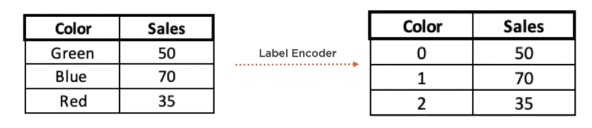

### One Hot Encoding
- It creates binary variable for each unique categorical value



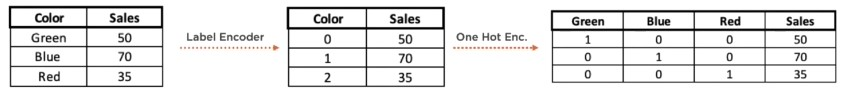

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# creating dataframe

phone_df = pd.DataFrame([
        ["Phone 1", "Blue", 2018, 500],
        ["Phone 2", "Black", 2016, 450],
        ["Phone 3", "Blue", 2017, 600],
        ["Phone 4", "Grey", 2018, 800]])

phone_df.columns = ["Phone", "Color", "Year", "Price"]

In [ ]:
# created df
phone_df

,Phone,Color,Year,Price
0,Phone 1,Blue,2018,500
1,Phone 2,Black,2016,450
2,Phone 3,Blue,2017,600
3,Phone 4,Grey,2018,800


In [ ]:
# importing label encoder using scikit learn
# this is to initialize the two label encoders- 1 for phone and 1 for column


from sklearn.preprocessing import LabelEncoder

le_phone = LabelEncoder()
le_color = LabelEncoder()

In [ ]:
# label encoding the categorical features

phone_df["phone_enc"] = le_phone.fit_transform(phone_df["Phone"])
phone_df["color_enc"] = le_color.fit_transform(phone_df["Color"])

In [ ]:
phone_df

,Phone,Color,Year,Price,phone_enc,color_enc
0,Phone 1,Blue,2018,500,0,1
1,Phone 2,Black,2016,450,1,0
2,Phone 3,Blue,2017,600,2,1
3,Phone 4,Grey,2018,800,3,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# one hot encoding

phone_ohe = OneHotEncoder()  # initializing one hot encode to transform the phone feature
color_ohe = OneHotEncoder()


#the fit transform method expects it to be array
#reshape to transform 1D to a 2D array
# the fit transform method  returns a sparse array, which is an array of data in which many elements havea value of zero
# used the to array method to return a Numpy array and assign this to a variable  phone_ohe array.
# then we do the same for the color feature

phone_ohe_array = phone_ohe.fit_transform(phone_df["phone_enc"].values.reshape(-1,1)).toarray()

color_ohe_array = color_ohe.fit_transform(phone_df["color_enc"].values.reshape(-1,1)).toarray()

In [ ]:
phone_ohe_array

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

* for phone feature first

In [ ]:
# adding the ohe'd features back to the original dataset
# we will do it first for the phone feature

phone_df_ohe = pd.DataFrame(phone_ohe_array,
              columns= ["Phone_"+str(int(i))for i in range(phone_ohe_array.shape[1])])
# the new dataframe under the phone_+ columns will be filled with one hot encoded numbers

phone_df = pd.concat([phone_df, phone_df_ohe], axis=1) #concatenating back to the original dataset

In [ ]:
phone_df

,Phone,Color,Year,Price,phone_enc,color_enc,Phone_0,Phone_1,Phone_2,Phone_3
0,Phone 1,Blue,2018,500,0,1,1.0,0.0,0.0,0.0
1,Phone 2,Black,2016,450,1,0,0.0,1.0,0.0,0.0
2,Phone 3,Blue,2017,600,2,1,0.0,0.0,1.0,0.0
3,Phone 4,Grey,2018,800,3,2,0.0,0.0,0.0,1.0


* for the color feature

In [ ]:
# adding the ohe'd features back to the original dataset
# we will do it now for the color feature
color_df_ohe = pd.DataFrame(color_ohe_array,
                            columns= ["Color_"+str(int(i))for i in range(color_ohe_array.shape[1])])


phone_df = pd.concat([phone_df, color_df_ohe], axis=1)

phone_df

,Phone,Color,Year,Price,phone_enc,color_enc,Phone_0,Phone_1,Phone_2,Phone_3,Color_0,Color_1,Color_2
0,Phone 1,Blue,2018,500,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Phone 2,Black,2016,450,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Phone 3,Blue,2017,600,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Phone 4,Grey,2018,800,3,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# We drop the columns that supplied us with categorical values.
#this will now only show all numerical values
# now the data set is now ready to be run through a machine learning model

phone_df.drop(["Phone", "Color", "phone_enc", "color_enc"], axis=1)


,Year,Price,Phone_0,Phone_1,Phone_2,Phone_3,Color_0,Color_1,Color_2
0,2018,500,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016,450,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2017,600,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2018,800,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Get_Dummies

- Converts categorical variable into dummy/indicator variable

Important parameters:
* data-  data of which to get dummy
*columns- column names in the datarame to be encoded



In [ ]:
phone_df

,Phone,Color,Year,Price
0,Phone 1,Blue,2018,500
1,Phone 2,Black,2016,450
2,Phone 3,Blue,2017,600
3,Phone 4,Grey,2018,800


In [ ]:
#this specifies the dataframe in question and also the columns that need to be encoded

phone_df_dummies = pd.get_dummies(phone_df, columns=["Phone", "Color"])
phone_df_dummies

,Year,Price,Phone_Phone 1,Phone_Phone 2,Phone_Phone 3,Phone_Phone 4,Color_Black,Color_Blue,Color_Grey
0,2018,500,1,0,0,0,0,1,0
1,2016,450,0,1,0,0,1,0,0
2,2017,600,0,0,1,0,0,1,0
3,2018,800,0,0,0,1,0,0,1


### Problems with using GET_DUMMMIES()
- The issues is that if you have already fit the coded dummy numbers in you machine learning during your train set with three colors, the model will not accept the test set that has one more column for your predictions



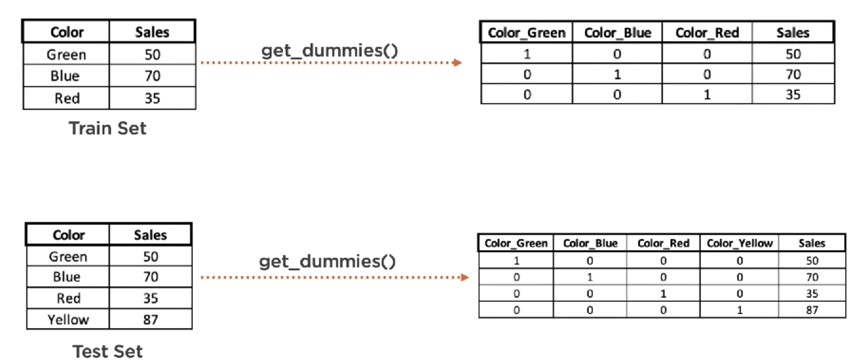


### How to solve this

- Use the OneHotEncoder
- The OHE has a parameter called 'Handle_unknown'

- The default value is 'ERROR" which will throw an error in case it encouters a new level in a categorical feature

- But you set the parameter to "IGNORE" and this will result in it not creating an additional column for a new level

- When this happens the encoder will not create a separate column for a new categorical value and instead well ignore it by just filling in zero for the features created for the other categorical values which were found common on both the datasets


### Crosstab
- in a way it does transform qualitative values into quantitative ones which can be use to understand the data better

- builds a cross- tabulation table that shows the frequency with which certain categories appear in the data

- This comes handy for exploratory data analysis and visualization purposes

- Two required parameters
*INDEX- values to group by in the rows
*COLUMNS- values to group by in the columns



In [ ]:
# loading the dataset

adult_df = pd.read_csv("adult.csv")
adult_df.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [ ]:
pd.crosstab(adult_df.occupation, adult_df.education_level)

education_level,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
occupation,,,,,,,,,,,,,,,,
Adm-clerical,59,100,49,5,8,20,20,278,267,752,5,2028,102,3,11,1833
Armed-Forces,0,0,1,0,0,0,0,0,0,1,0,5,2,0,1,4
Craft-repair,232,266,89,28,68,166,140,166,370,323,4,2882,33,6,9,1238
Exec-managerial,42,50,18,5,6,27,22,237,232,1977,83,1182,762,1,63,1277
Farming-fishing,70,67,29,33,52,105,44,25,85,112,1,567,14,17,7,252
Handlers-cleaners,108,176,54,25,58,64,72,32,43,77,0,934,5,5,0,393
Machine-op-inspct,149,153,60,36,87,128,101,51,93,87,1,1515,12,12,0,485
Other-service,279,366,124,53,94,141,139,110,155,243,0,1892,34,21,7,1150
Priv-house-serv,8,18,8,14,19,17,16,2,5,11,1,86,0,2,0,25


In [ ]:
#adding a row namely total at the very end

pd.crosstab(adult_df.occupation, adult_df.education_level, margins=True, margins_name="Total")

education_level,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Total
occupation,,,,,,,,,,,,,,,,,
Adm-clerical,59,100,49,5,8,20,20,278,267,752,5,2028,102,3,11,1833,5540
Armed-Forces,0,0,1,0,0,0,0,0,0,1,0,5,2,0,1,4,14
Craft-repair,232,266,89,28,68,166,140,166,370,323,4,2882,33,6,9,1238,6020
Exec-managerial,42,50,18,5,6,27,22,237,232,1977,83,1182,762,1,63,1277,5984
Farming-fishing,70,67,29,33,52,105,44,25,85,112,1,567,14,17,7,252,1480
Handlers-cleaners,108,176,54,25,58,64,72,32,43,77,0,934,5,5,0,393,2046
Machine-op-inspct,149,153,60,36,87,128,101,51,93,87,1,1515,12,12,0,485,2970
Other-service,279,366,124,53,94,141,139,110,155,243,0,1892,34,21,7,1150,4808
Priv-house-serv,8,18,8,14,19,17,16,2,5,11,1,86,0,2,0,25,232


In [ ]:
#we can also include values to aggregate
# find the mean age of both males and females according to their profession

pd.crosstab(adult_df.occupation, adult_df.sex, values=adult_df.age, aggfunc="mean")

sex,Female,Male
occupation,,
Adm-clerical,36.995442,37.650829
Armed-Forces,NaN,31.785714
Craft-repair,39.746032,38.922524
Exec-managerial,39.657773,43.238498
Farming-fishing,39.578947,41.446209
Handlers-cleaners,35.011858,32.262131
Machine-op-inspct,38.520807,37.401929
Other-service,35.602952,34.397045
Priv-house-serv,44.137615,33.928571


In [ ]:
# grouping with crosstab

pd.crosstab([adult_df["marital-status"], adult_df["workclass"]], adult_df["sex"])

sex                                        Female   Male
marital-status         workclass                        
 Divorced               Federal-gov           141     94
                        Local-gov             385    138
                        Private              2846   1814
                        Self-emp-inc           45     98
                        Self-emp-not-inc      156    267
                        State-gov             212    101
 Married-AF-spouse      Federal-gov             2      1
                        Private                16      8
                        Self-emp-not-inc        1      2
                        State-gov               2      0
 Married-civ-spouse     Federal-gov            60    647
                        Local-gov             229   1290
                        Private              1557  12647
                        Self-emp-inc           66   1159
                        Self-emp-not-inc      189   2327
                        State-gov             108    763
                        Without-pay             4      9
 Married-spouse-absent  Federal-gov             7      8
                        Local-gov              22     10
                        Private               213    213
                        Self-emp-inc            2      5
                        Self-emp-not-inc       16     32
                        State-gov              13     10
                        Without-pay             1      0
 Never-married          Federal-gov           172    188
                        Local-gov             428    362
                        Private              5375   6636
                        Self-emp-inc           52    155
                        Self-emp-not-inc      149    448
                        State-gov             336    291
                        Without-pay             1      5
 Separated              Federal-gov            25     13
                        Local-gov              60     36
                        Private               688    417
                        Self-emp-inc            8     17
                        Self-emp-not-inc       30     54
                        State-gov              41     22
 Widowed                Federal-gov            38     10
                        Local-gov             120     20
                        Private               733    144
                        Self-emp-inc           26     13
                        Self-emp-not-inc       76     49
                        State-gov              43      4
                        Without-pay             1      0